In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import matplotlib.pyplot as plt

C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#loading the dataset
train = pd.read_csv('D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test = pd.read_csv('D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\test.csv')
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_test_datasets = [train,test]
train_test_datasets

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [9]:
median_age = train['Age'].median()
median_fare = train['Fare'].median()
for dataset in train_test_datasets:
    dataset['Age'].fillna(median_age,inplace=True)
    dataset['Fare'].fillna(median_fare,inplace=True)

In [10]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [11]:
type(train['Cabin'][1])

str

In [12]:
type(train['Cabin'][2])

float

In [13]:
train['Cabin'].isna().sum()

687

In [14]:
for dataset in train_test_datasets:
    dataset['Cabin Letter'] = dataset['Cabin'].str.slice(0,1)
train['Cabin Letter']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin Letter, Length: 891, dtype: object

In [15]:
train['Cabin Letter'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [16]:
for dataset in train_test_datasets:
    dataset["Cabin Letter"] = pd.Categorical(dataset["Cabin Letter"]).codes
train["Cabin Letter"]

0     -1
1      2
2     -1
3      2
4     -1
      ..
886   -1
887    1
888   -1
889    2
890   -1
Name: Cabin Letter, Length: 891, dtype: int8

In [17]:
for dataset in train_test_datasets:
    dataset.drop('Cabin',axis=1,inplace=True)

In [18]:
for dataset in train_test_datasets:
    dataset['Embarked'] = pd.Categorical(dataset['Embarked'])
    dataset['Embarked'] = dataset['Embarked'].cat.codes

In [19]:
for dataset in train_test_datasets:
    dataset.drop(['Name','Ticket'],axis=1,inplace=True)

In [20]:
for dataset in train_test_datasets:
    dataset['Sex'] = pd.Categorical(dataset['Sex']).codes

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Sex           891 non-null    int8   
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Fare          891 non-null    float64
 8   Embarked      891 non-null    int8   
 9   Cabin Letter  891 non-null    int8   
dtypes: float64(2), int64(5), int8(3)
memory usage: 51.5 KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Sex           418 non-null    int8   
 3   Age           418 non-null    float64
 4   SibSp         418 non-null    int64  
 5   Parch         418 non-null    int64  
 6   Fare          418 non-null    float64
 7   Embarked      418 non-null    int8   
 8   Cabin Letter  418 non-null    int8   
dtypes: float64(2), int64(4), int8(3)
memory usage: 20.9 KB


# Converting categories to dummy variables

In [23]:
train['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [24]:
pd.get_dummies(train['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [25]:
categorical_cols = ['Pclass','Sex','Embarked','Cabin Letter','SibSp']
train_dummies = pd.get_dummies(train, columns=categorical_cols,prefix=categorical_cols)
test_dummies = pd.get_dummies(test, columns=categorical_cols,prefix=categorical_cols)

In [26]:
train_dummies.shape

(891, 30)

In [27]:
test_dummies.shape

(418, 27)

In [28]:
train_dummies.columns

Index(['PassengerId', 'Survived', 'Age', 'Parch', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1', 'Embarked_-1', 'Embarked_0',
       'Embarked_1', 'Embarked_2', 'Cabin Letter_-1', 'Cabin Letter_0',
       'Cabin Letter_1', 'Cabin Letter_2', 'Cabin Letter_3', 'Cabin Letter_4',
       'Cabin Letter_5', 'Cabin Letter_6', 'Cabin Letter_7', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'],
      dtype='object')

In [29]:
test_dummies.columns

Index(['PassengerId', 'Age', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_0', 'Sex_1', 'Embarked_0', 'Embarked_1', 'Embarked_2',
       'Cabin Letter_-1', 'Cabin Letter_0', 'Cabin Letter_1', 'Cabin Letter_2',
       'Cabin Letter_3', 'Cabin Letter_4', 'Cabin Letter_5', 'Cabin Letter_6',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8'],
      dtype='object')

In [30]:
# Load data
train = pd.read_csv("D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\train.csv", index_col='PassengerId')
test = pd.read_csv("D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\test.csv", index_col='PassengerId')
 
# Merge train and test for wrangling and preprocessing
train_test_datasets = [train, test]
 
"""Data wrangling"""
# Split cabin into letter and number
median_age = train["Age"].median()
median_fare = train["Fare"].median()
for idx, dataset in enumerate(train_test_datasets):
    dataset["Age"].fillna(median_age, inplace=True)
    dataset["Fare"].fillna(median_fare, inplace=True)
    dataset["Cabin Letter"] = dataset["Cabin"].str.slice(0, 1)
    dataset.drop("Cabin", axis=1, inplace=True)
    #dataset["Embarked"] = dataset["Embarked"].cat.codes
    dataset.drop(["Name", "Ticket"], axis=1, inplace=True)
 
categorical_cols = ["Pclass", "Sex", "Embarked", "Cabin Letter","SibSp"]
train_dummies = pd.get_dummies(train,
                               columns=categorical_cols,
                               prefix=categorical_cols,
                               dummy_na=True)
 
test_dummies = pd.get_dummies(test,
                              columns=categorical_cols,
                              prefix=categorical_cols,
                              dummy_na=True)

In [31]:
train_dummies.shape

(891, 32)

In [32]:
test_dummies.shape

(418, 30)

In [33]:
train_dummies.columns

Index(['Survived', 'Age', 'Parch', 'Fare', 'Pclass_1.0', 'Pclass_2.0',
       'Pclass_3.0', 'Pclass_nan', 'Sex_female', 'Sex_male', 'Sex_nan',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan',
       'Cabin Letter_A', 'Cabin Letter_B', 'Cabin Letter_C', 'Cabin Letter_D',
       'Cabin Letter_E', 'Cabin Letter_F', 'Cabin Letter_G', 'Cabin Letter_T',
       'Cabin Letter_nan', 'SibSp_0.0', 'SibSp_1.0', 'SibSp_2.0', 'SibSp_3.0',
       'SibSp_4.0', 'SibSp_5.0', 'SibSp_8.0', 'SibSp_nan'],
      dtype='object')

In [34]:
test_dummies.columns

Index(['Age', 'Parch', 'Fare', 'Pclass_1.0', 'Pclass_2.0', 'Pclass_3.0',
       'Pclass_nan', 'Sex_female', 'Sex_male', 'Sex_nan', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Embarked_nan', 'Cabin Letter_A',
       'Cabin Letter_B', 'Cabin Letter_C', 'Cabin Letter_D', 'Cabin Letter_E',
       'Cabin Letter_F', 'Cabin Letter_G', 'Cabin Letter_nan', 'SibSp_0.0',
       'SibSp_1.0', 'SibSp_2.0', 'SibSp_3.0', 'SibSp_4.0', 'SibSp_5.0',
       'SibSp_8.0', 'SibSp_nan'],
      dtype='object')

In [35]:
test_dummies['Cabin_Letter_T'] = np.zeros(test_dummies.shape[0])

In [36]:
#Number of rows in the dataframe
total_samples = train_dummies.shape[0]
total_samples

891

In [37]:
#Number of survivors
number_surviving = (train_dummies['Survived'] == 1).sum()
number_surviving

342

In [38]:
perc_survivors = (number_surviving / total_samples) * 100
perc_survivors

38.38383838383838

In [39]:
bool_survivors = train_dummies['Survived'] == 1
bool_nonsurvivors = train_dummies['Survived'] == 0
all_survivors = train_dummies[bool_survivors]
all_nonsurvivors = train_dummies[bool_nonsurvivors]
random_nonsurvivors = all_nonsurvivors.sample(number_surviving)
train_balanced = pd.concat((all_survivors,random_nonsurvivors))
train_balanced = train_balanced.sample(frac=1)
(train_balanced['Survived'] == 0).sum()

342

In [40]:
(train_balanced['Survived'] == 1).sum(0)

342

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(train_dummies.iloc[:,1:])
train_scaled = scaler.transform(train_balanced.iloc[:,1:])
test_scaled = scaler.transform(test_dummies)
train_scaled = pd.DataFrame(train_scaled,index=train_balanced.index,columns=train_balanced.iloc[:,1:].columns)
test_scaled = pd.DataFrame(test_scaled,index=test_dummies.index,columns=test_dummies.columns)
y = train_balanced['Survived']

C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cabin_Letter_T
Feature names seen at fit time, yet now missing:
- Cabin Letter_T

  warnings.warn(message, FutureWarning)


In [43]:
train_balanced['Age'].mean()

29.191769005847952

In [44]:
train_balanced["Age"].std()

13.274992184941311

In [45]:
train_scaled.shape

(684, 31)

In [46]:
test_scaled.shape

(418, 31)

In [47]:
x = train_scaled
x_train,x_validate,y_train,y_validate = train_test_split(x,y,test_size=0.1)

In [48]:
x_train.shape

(615, 31)

In [49]:
x_validate.shape

(69, 31)

In [50]:
train_features = torch.tensor(x_train.to_numpy())
train_labels = torch.tensor(y_train.to_numpy())

validation_features = torch.tensor(x_validate.to_numpy())
validation_labels = torch.tensor(y_validate.to_numpy())

In [51]:
n_features = train_features.shape[1]
n_features

31

In [52]:
model = torch.nn.Sequential(torch.nn.Linear(n_features,50),torch.nn.ReLU(),torch.nn.Linear(50,1),torch.nn.Sigmoid())

* This network takes our 31 input features and transforms them to 50 hidden units using a fully connected linear layer. This layer also learns a bias term by default. We then apply the rectifying linear unit to introduce some non-linearity. We then convert the 50 hidden units to one output unit, to which we apply the Sigmoid function. This means our deep neural network has one hidden layer with 50 units. The Sigmoid function makes sure that our output domain is between 0 and 1. This is important because we are making a binary classification of surviving (1) and non-surviving (0) passengers. Now we define our loos function and our learning method.

In [53]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001,weight_decay=0.001)

* Our loss function is binary cross entropy loss, which works well for the binary classification problem we are facing. Our learning algorithm is Adam, a variety of gradient descent that features L2 regularization (weight_decay). Before we start training we will split our train data into 41 mini batches.

In [54]:
n_batches = 41
train_features_batched = train_features.reshape(41,
                                               int(train_features.shape[0]/n_batches),
                                               train_features.shape[1])
train_labels_batched = train_labels.reshape(n_batches,
                                            int(train_labels.shape[0]/n_batches))

In [55]:
n_epochs = 2000
loss_list = []
validate_loss_list = []
 
for epoch in range(n_epochs):
    for batch_idx in range(n_batches):
        optimizer.zero_grad()
         
        outputs = model(train_features_batched[batch_idx].float())
         
     
        loss = criterion(outputs.flatten().float(),
                         train_labels_batched[batch_idx].float())
     
         
        loss.backward()
         
        optimizer.step()
         
    outputs = model(train_features.float())
     
    validation_outputs = model(validation_features.float())
     
         
    loss = criterion(outputs.flatten().float(),
                     train_labels.float())
     
    validate_loss = criterion(validation_outputs.flatten().float(),
                              validation_labels.float())
     
    loss_list.append(loss.item())
     
    validate_loss_list.append(validate_loss)

print('Finished Training')

Finished Training


Text(0, 0.5, 'BCE Loss')

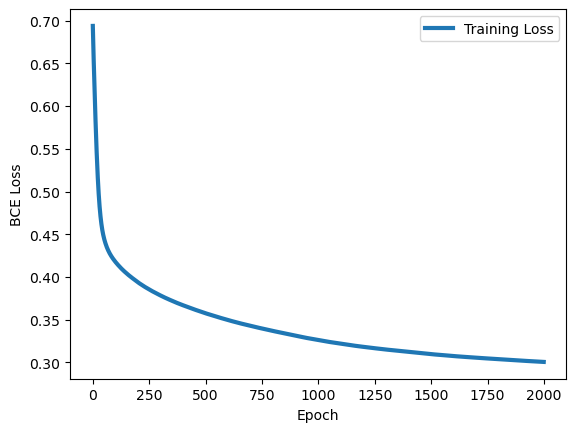

In [56]:
plt.plot(loss_list, linewidth=3)
#plt.plot(validate_loss_list, linewidth=3)
plt.legend(("Training Loss", "Validation Loss"))
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

In [57]:
test_features = torch.tensor(test_scaled.to_numpy())
 
test_prediction = model(test_features.float()).detach().numpy().flatten()
 
test_prediction_binary = (test_prediction > 0.5).astype(np.int)
 
test_prediction_df = pd.DataFrame(test_prediction_binary,
                                  index=test.index,
                                  columns=["Survived"])
 
test_prediction_df.to_csv("prediction_submission.csv")

C:\Users\binur\AppData\Local\Temp\ipykernel_18740\3853153491.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_prediction_binary = (test_prediction > 0.5).astype(np.int)
